In [1]:
# IMPORT MATRIX PROFILE

from obspy import read, UTCDateTime, Stream
import os
import numpy as np
import sys
import time
from glob import glob
from seiscamp.MPLib import *
from seiscamp.GraphLib import *
from seiscamp.util import *
import logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s\t%(name)s\t%(levelname)s\t%(message)s")

#fname_mp = sys.argv[1]

#fname_mp = "20200901000000.000000_20201001235959.980000_FRS4_HHZ_50Hz_win250samp_mp.npy"
#fname_mp = "20210130000000.000000_20210130235959.996000_BH012_DPZ_250Hz_win125samp_mp.npy"
fname_mp = "20200218000000.000000_20200218235959.996000_BH012_DPZ_250Hz_win125samp_mp.npy"
#fname_mp = "20200310000000.000000_20200310235959.996000_G12_DPZ_250Hz_win125samp_mp.npy"
#fname_mp = "20200301000000.000000_20200331235959.980000_FRS4_HHZ_50Hz_win250samp_mp.npy"
#fname_mp = "20200201000000.000000_20200302235959.980000_FRS4_HHZ_50Hz_win500samp_mp.npy"
#fname_mp = "20200301000000.000000_20200331235959.980000_FRS5_HHZ_50Hz_win500samp_mp.npy"
#fname_mp = "20200301000000.000000_20200330235959.980000_FRS5_HHZ_50Hz_win25samp_mp.npy"
fname_ind = fname_mp.replace("_mp", "_ind")

# input_dir = "/home/genevieve.savard/seismo-pyscamp/scripts_frs/matrix_profiles_ARC"
input_dir = "/home/genevieve.savard/seismo-pyscamp/scripts_frs/matrix_profiles"
mp = np.load(os.path.join(input_dir, fname_mp))
ind = np.load(os.path.join(input_dir, fname_ind))

station = os.path.split(fname_mp)[1].split("_")[2]
channel = os.path.split(fname_mp)[1].split("_")[3]
print("Station %s, channel %s" % (station, channel))
starttime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[0])
endtime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[1])
num_days = round((endtime - starttime)/(3600*24.))
fs = float(os.path.split(fname_mp)[1].split("_")[4].split("Hz")[0])
print("Start time %s" % starttime)
print("End time %s" % endtime)
print("# days %s" % num_days)
print("Sampling rate: %s" % fs)

sublen_samp = int(os.path.split(fname_mp)[1].split("_")[5].split("win")[1].split("samp")[0])
print("sublen_samp = %d" % sublen_samp)
print("Length of MP: %d samples" % mp.shape[0])

# mpObj = MatrixProfile(mp=mp, ind=ind, trace=trace, sublen=sublen_samp)
mpObj = MatrixProfile(mp=mp, ind=ind, 
                      station=station, channel=channel, fs=fs, sublen=sublen_samp,
                      starttime=starttime, endtime=endtime)

# Get detections
mpObj.get_peaks()

# Get unique windows
tol = int(sublen_samp * 0.5)
_, pairs, ref_windows = mpObj.group_ids(tol=tol)

# #mpObj.group_ids(tol=100)
# mpObj.group_ids(tol=20)

Station BH012, channel DPZ
Start time 2020-02-18T00:00:00.000000Z
End time 2020-02-18T23:59:59.996000Z
# days 1
Sampling rate: 250.0
sublen_samp = 125
Length of MP: 21599876 samples


2021-03-23 21:03:29,988	seiscamp.MPLib	INFO	Remove 0 peak detections where CC > 1
2021-03-23 21:03:30,001	seiscamp.MPLib	INFO	# peaks found: 4626


In [34]:
# GET DATA

trace1 = get_stream_days(station=station, channel=channel, first_day=starttime, num_days=num_days, fs=fs)

print(trace1)
tvec = trace1.times("matplotlib")

2021-03-23 20:26:01,101	seiscamp.util	INFO	Getting data stream for station BH012, channel DPZ...
2021-03-23 20:26:01,106	seiscamp.util	INFO	Looking for data for day 049
2021-03-23 20:26:01,327	seiscamp.util	INFO	Reading file /home/gilbert_lab/cami_frs/all_daily_symlinks/2020/049/8O.BH012..DPZ.D.20200218.000000.000000_unitmps.sac
2021-03-23 20:31:50,820	seiscamp.util	INFO	Merging stream
2021-03-23 20:31:50,831	seiscamp.util	INFO	1 Trace(s) in Stream:
8O.BH012..DPZ | 2020-02-18T00:00:00.000000Z - 2020-02-19T00:00:00.000000Z | 250.0 Hz, 21600001 samples
2021-03-23 20:31:54,851	seiscamp.util	INFO	Final trace: 
2021-03-23 20:31:54,856	seiscamp.util	INFO	8O.BH012..DPZ | 2020-02-18T00:00:00.000000Z - 2020-02-19T00:00:00.000000Z | 250.0 Hz, 21600001 samples
2021-03-23 20:31:55,207	seiscamp.util	INFO		Final Stream:
2021-03-23 20:31:55,211	seiscamp.util	INFO		Sampling rate: 250.000000
2021-03-23 20:31:55,218	seiscamp.util	INFO		Start time: 2020-02-18 00:00:00
2021-03-23 20:31:55,221	seiscamp.uti

8O.BH012..DPZ | 2020-02-18T00:00:00.000000Z - 2020-02-19T00:00:00.000000Z | 250.0 Hz, 21600001 samples


615001 620001 5000
5000 5000


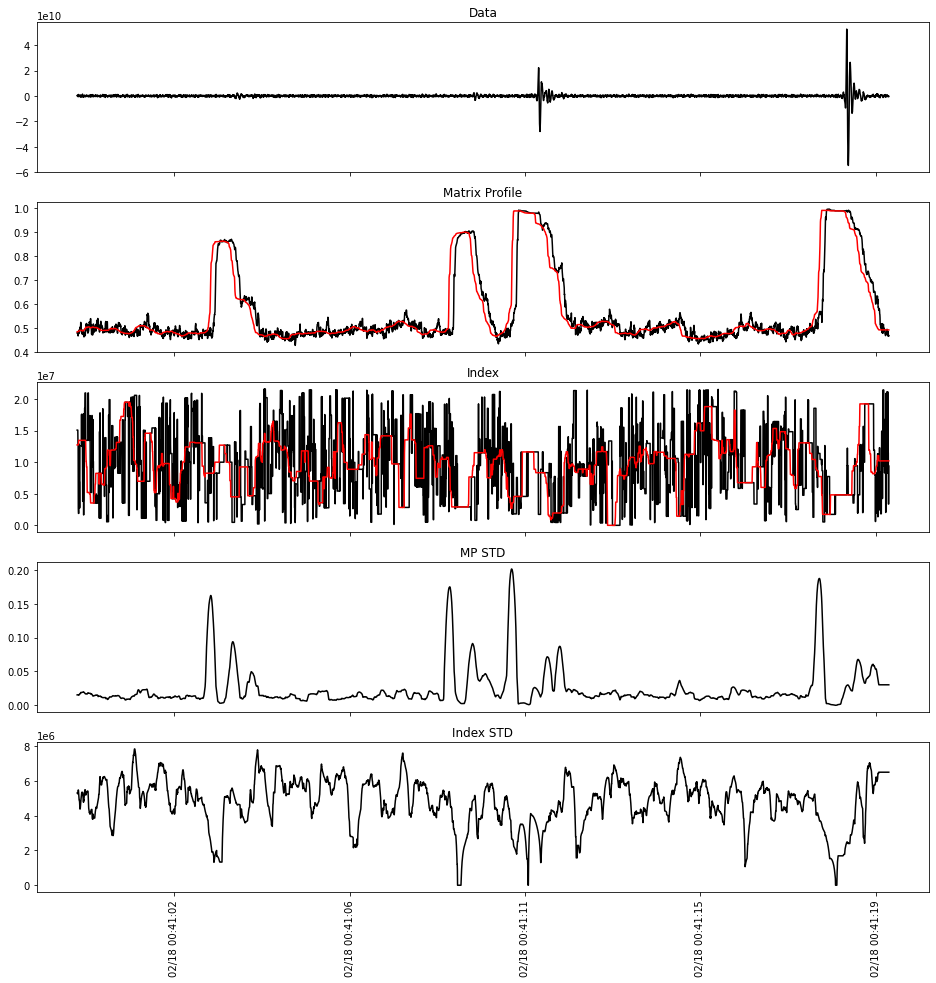

In [36]:
# PLOT time window

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# t1 = mdates.date2num(UTCDateTime(2020,3,10,7,2,33)._get_datetime())
# t2 = mdates.date2num(UTCDateTime(2020,3,10,7,2,36)._get_datetime())
t1 = mdates.date2num(UTCDateTime(2020,2,18,0,41,0)._get_datetime())
t2 = mdates.date2num(UTCDateTime(2020,2,18,0,41,20)._get_datetime())
# t1 = mdates.date2num(UTCDateTime(2021,1,30,0,0,0)._get_datetime())
# t2 = mdates.date2num(UTCDateTime(2021,1,30,7,0,0)._get_datetime())
# t1=tvec[0]
# t2=tvec[-1]
i1 = np.argmax(tvec>t1)
i2 = np.argmax(tvec>t2)
id1 = i1 #+ (sublen_samp - 1)
id2 = i2 #+ (sublen_samp - 1)
print(i1, i2, i2-i1)



def RunningStd(x,N):
    idx = np.arange(N) + np.arange(len(x)-N+1)[:,None]
    #b = [row[row>0] for row in x[idx]] # to exclude 0's
    #return np.array(map(np.std,b)) # to exclude 0's
    #return np.std(x[idx],axis=1) # no padding
    return np.pad(np.std(x[idx],axis=1), pad_width=(0, N-1), mode="edge")
    #return np.array([np.median(c) for c in b])  # This also works
    
def RunningMedian(x,N):
    idx = np.arange(N) + np.arange(len(x)-N+1)[:,None]
    return np.pad(np.median(x[idx],axis=1), pad_width=(0, N-1), mode="edge")

def RunningMean(x,N):
    idx = np.arange(N) + np.arange(len(x)-N+1)[:,None]
    return np.pad(np.mean(x[idx],axis=1), pad_width=(0, N-1), mode="edge")
    
mp = mpObj.mp[i1:i2]
ind = mpObj.ind[i1:i2]

N = int(sublen_samp * 0.5)
mpmed = RunningMedian(mp, N=N)
mpstd = RunningStd(mp, N=N)
indstd = RunningStd(ind, N=N)
indmed = RunningMedian(ind, N=N)
print(len(mp), len(mpstd))

fig, axs = plt.subplots(5,1, sharex=True, figsize=(16,16))
axs[0].plot(tvec[id1:id2], trace1.data[id1:id2], "k")
axs[0].set_title("Data")
axs[1].plot(tvec[id1:id2], mpObj.mp[i1:i2], "k")
axs[1].plot(tvec[id1:id2], mpmed, "r")
axs[1].set_title("Matrix Profile")
axs[2].plot(tvec[id1:id2], mpObj.ind[i1:i2], "k")
axs[2].plot(tvec[id1:id2], indmed, "r")
axs[2].set_title("Index")
axs[3].plot(tvec[id1:id2], mpstd, "k")
axs[3].set_title("MP STD")
axs[4].plot(tvec[id1:id2], indstd, "k")
axs[4].set_title("Index STD")


hfmt = mdates.DateFormatter('%m/%d %H:%M:%S')
#axs[0].xaxis.set_minor_locator(mdates.SecondLocator())
#ax.xaxis.set_major_locator(dates.MinuteLocator())
axs[0].xaxis.set_major_formatter(hfmt)
plt.xticks(rotation='vertical')
plt.show()
plt.close()

In [13]:
mpObj.get_peaks()

# TIME WINDOWS 
# #mpObj.group_ids(tol=100)
tol = int(sublen_samp * 0.5)
mpObj.group_ids(tol=tol)

pos1 = mpObj.pairs["Index1"].values  
pos2 = mpObj.pairs["Index2"].values 
pos = np.unique(np.hstack((pos1, pos2)))

for ix in pos:
    tix = mpObj.mp_starttime + ix/mpObj.fs
    print(tix)
    

2021-03-23 19:58:25,462	seiscamp.MPLib	INFO	Building the graph...
2021-03-23 19:58:36,689	seiscamp.MPLib	INFO	Getting connected components...
2021-03-23 19:58:36,823	seiscamp.MPLib	INFO	Found 630 groups.


KeyboardInterrupt: 

In [7]:
from IPython.display import SVG

import numpy as np
from scipy import sparse

from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

# Create graph
subset = mpObj.pairs[["win_id_1", "win_id_2", "peak_cc"]]

edgelist = [tuple(x) for x in subset.to_numpy()]
adjacency = edgelist2adjacency(edgelist)

#image = svg_graph(adjacency)
#SVG(image)

In [8]:
# CONNECTED COMPONENTS AND LABELS

from sknetwork.topology import connected_components

labels = connected_components(adjacency)
print(set(labels))

# GROUPS

import networkx as nx
from networkx.algorithms.components import *

G = nx.from_scipy_sparse_matrix(adjacency)

#print(is_connected(G))
#print(number_connected_components(G))

groups = [G.subgraph(c).copy() for c in nx.connected_components(G)]

for i, group in enumerate(groups):
    print("Group %d: %d nodes." % (i, len(group)))
#    print(is_connected(group))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Group 0: 4199 nodes.
Group 1: 15 nodes.
Group 2: 71 nodes.
Group 3: 18 nodes.
Group 4: 5 nodes.
Group 5: 6 nodes.
Group 6: 37 nodes.
Group 7: 2 nodes.
Group 8: 24 nodes.
Group 9: 2 nodes.
Group 10: 2 nodes.
Group 11: 5 nodes.
Group 12: 9 nodes.
Group 13: 23 nodes.
Group 14: 9 nodes.
Group 15: 2 nodes.
Group 16: 2 nodes.
Group 17: 2 nodes.
Group 18: 3 nodes.
Group 19: 2 nodes.
Group 20: 4 nodes.
Group 21: 6 nodes.
Group 22: 3 nodes.
Group 23: 2 nodes.
Group 24: 2 nodes.
Group 25: 2 nodes.
Group 26: 5 nodes.
Group 27: 7 nodes.
Group 28: 7 nodes.
Group 29: 2 nodes.
Group 30: 10 nodes.
Group 31: 2 nodes.
Group 32: 2 nodes.
Group 33: 5 nodes.
Group 34: 3 nodes.
Group 35: 2 nodes.
Group 36: 2 nodes.
Group 37: 2 nodes.
Group 38: 2 nodes.
Group 39: 2 nodes.
Group 40: 2 nodes.
Group 41: 2 nodes.

group 0
4199
0.889487537525


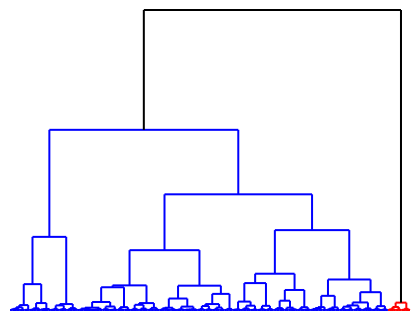

In [9]:
from sknetwork.hierarchy import Paris, BiParis, cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_dendrogram
%matplotlib inline

i = 0
group = groups[i]
print("group %d" % i)
group = groups[i]
print(len(group))
tmp = nx.to_scipy_sparse_matrix(group)
paris = Paris()
dendrogram = paris.fit_transform(tmp)
score = tree_sampling_divergence(tmp, dendrogram, normalized=True)
print(score)
image = svg_dendrogram(dendrogram)
SVG(image)

group 2
71
0.785884502447


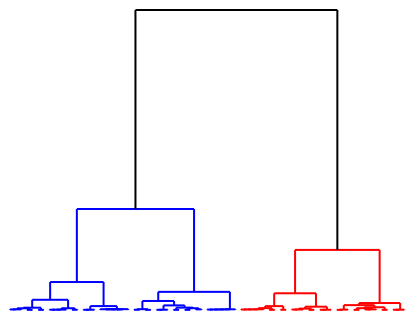

In [12]:
i = 2
group = groups[i]
print("group %d" % i)
group = groups[i]
print(len(group))
tmp = nx.to_scipy_sparse_matrix(group)
paris = Paris()
dendrogram = paris.fit_transform(tmp)
score = tree_sampling_divergence(tmp, dendrogram, normalized=True)
print(score)
image = svg_dendrogram(dendrogram)
SVG(image)


In [ ]:
# Cut tree
labels = cut_straight(dendrogram, n_clusters = 4)
print(labels)